In [416]:
from sklearn.datasets import make_moons, load_digits
from sklearn import preprocessing, metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, PrecisionRecallDisplay, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay

1. Представити початковi данi графiчно.

In [417]:
# Load the digits dataset
digits = load_digits()
def print_digits():
    _, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
    for ax, image, label in zip(axes, digits.images, digits.target):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("Classes:%i" % label)

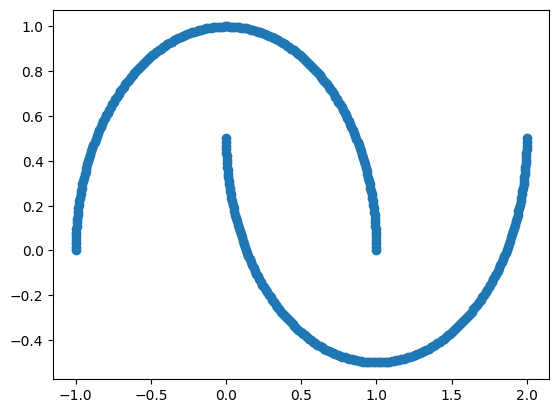

In [418]:
X, y = make_moons(n_samples= 400, noise=0)
#при такой и такой точке, котрые в массиве Х сопоставлены, соотвественно такой клас у(там 0 или 1)
def print_moons():
    plt.scatter(X[:, 0], X[:, 1])
#plt.scatter(*X.T)
print_moons()


2. Розбити данi на навчальний та валiдацiйний набори.

In [419]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [420]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Xdigits_train, Xdigits_test, ydigits_train, ydigits_test = train_test_split(
    data, digits.target, train_size=0.8, test_size=0.2, shuffle=False
)

In [421]:
'''
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, ydigits_model_GaussianNB in zip(axes, Xdigits_test, ydigits_model_GaussianNB):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {ydigits_model_GaussianNB}")
'''

'\n_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))\nfor ax, image, ydigits_model_GaussianNB in zip(axes, Xdigits_test, ydigits_model_GaussianNB):\n    ax.set_axis_off()\n    image = image.reshape(8, 8)\n    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")\n    ax.set_title(f"Prediction: {ydigits_model_GaussianNB}")\n'

3. Побудувати на навчальному наборi даних моделi класифiкацiї.

Данi в кожному класi мають нормальний розподiл без коварiацiї
мiж вимiрами; використати клас sklearn.naive_bayes.GaussianNB.

In [422]:
model_GaussianNB = GaussianNB()                   # 2. Створення екземпляру моделi
model_GaussianNB.fit(Xtrain, ytrain)              # 3. Навчання моделi на даних
y_model_GaussianNB = model_GaussianNB.predict(Xtest)        #4. Розрахунок прогнозу значень для нових даних

In [423]:
modeldigits_GaussianNB = GaussianNB()                   # 2. Створення екземпляру моделi
modeldigits_GaussianNB.fit(Xdigits_train, ydigits_train)              # 3. Навчання моделi на даних # Learn the digits on the train subset
ydigits_model_GaussianNB = modeldigits_GaussianNB.predict(Xdigits_test)        #4. Розрахунок прогнозу значень для нових даних # Predict the value of the digit on the test subset


In [424]:
print(ydigits_model_GaussianNB)

[2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 3 8 4 9 7 7 3 5 9 0 0 2 2 7 8 2 0 9 2 6
 3 3 7 3 3 4 6 6 6 4 9 9 5 0 5 5 2 8 2 0 0 9 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6
 8 4 3 9 4 0 5 3 6 9 6 9 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 0 0 8 9 8 0 1 2
 1 4 5 6 8 1 9 0 8 1 3 4 5 6 7 0 1 2 3 4 5 1 7 5 7 4 9 5 5 6 5 0 7 7 5 8 4
 1 7 7 8 5 1 0 0 1 2 7 8 1 0 1 9 6 8 7 7 7 8 7 6 6 6 7 7 1 5 0 9 1 9 1 0 1
 7 6 3 2 1 7 7 6 3 1 3 7 1 2 6 1 4 3 1 4 0 5 3 6 9 6 1 7 5 4 7 7 6 2 5 5 1
 5 8 4 5 0 7 7 7 0 8 2 5 4 5 6 7 8 9 0 1 8 8 4 5 6 7 8 9 0 1 2 5 4 5 6 7 8
 9 0 9 5 5 6 5 0 9 8 9 8 7 1 7 7 7 5 1 0 0 2 2 7 8 2 0 1 2 6 8 8 8 5 8 4 6
 6 6 4 9 1 5 0 9 5 2 8 2 0 0 8 7 6 3 2 1 7 4 6 3 8 3 9 1 7 6 8 4 5 1 4 0 5
 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 1 4 9 0 1 9 8]


Данi в кожному класi мають полiномiальний розподiл; використати
клас sklearn.naive_bayes.MultinomialNB.

Виникла проблема: ValueError: Negative values in data passed to MultinomialNB (input X) (розумію чому)
Варіанти вирішення, які я знайшов:

1.Skip MultinomialNB when some of the features have negative values.(неефективно, втрачається багато даних)

2.Use GaussianNB instead.(інше завдання, не підходить)

3.Normalize features to [0, 1] range.(найефективніше)

1.Skip MultinomialNB when some of the features have negative values.

In [425]:
'''
def get_y_positive(Xt, yt):
    k = []
    for i in Xt:
        if (i < 0).any():
            k.append(False)
        else:
            k.append(True)

    return yt[k]

get_y_positive(Xtrain, ytrain)

def get_x_positive(Xt):
    tmp = []
    for i in Xt:
        if (i >= 0).all():
            tmp.append(i)
    print(np.array(tmp))

#print(Xtrain)        
get_x_positive(Xtrain)
'''


'\ndef get_y_positive(Xt, yt):\n    k = []\n    for i in Xt:\n        if (i < 0).any():\n            k.append(False)\n        else:\n            k.append(True)\n\n    return yt[k]\n\nget_y_positive(Xtrain, ytrain)\n\ndef get_x_positive(Xt):\n    tmp = []\n    for i in Xt:\n        if (i >= 0).all():\n            tmp.append(i)\n    print(np.array(tmp))\n\n#print(Xtrain)        \nget_x_positive(Xtrain)\n'

3.Normalize features.

In [426]:
model_MultinomialNB = MultinomialNB()
model_MultinomialNB.fit((Xtrain + 1) , ytrain)
y_model_MultinomialNB = model_MultinomialNB.predict((Xtest))

In [427]:
modeldigits_MultinomialNB = MultinomialNB()
modeldigits_MultinomialNB.fit(Xdigits_train , ydigits_train)
ydigits_model_MultinomialNB = modeldigits_MultinomialNB.predict(Xdigits_test)

4. Представити моделi графiчно (побудував матриці відмінностей та decision boundry).
5. Виконати прогнози на основi побудованих моделей.

In [428]:

def get_accuary_score(ytest, y_model):
    return accuracy_score(ytest, y_model)

print(get_accuary_score(ytest, y_model_GaussianNB))
print(get_accuary_score(ydigits_test, ydigits_model_GaussianNB))

0.8875
0.8138888888888889


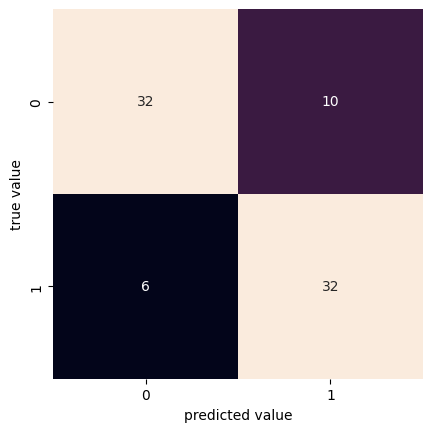

In [429]:
#матриця відмінностей
def print_confusion_matrix(ytest, y_model):
    mat = confusion_matrix(ytest, y_model)
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value') # Спрогнозоване значення
    plt.ylabel('true value');     # Істинне значення

print_confusion_matrix(ytest, y_model_MultinomialNB)



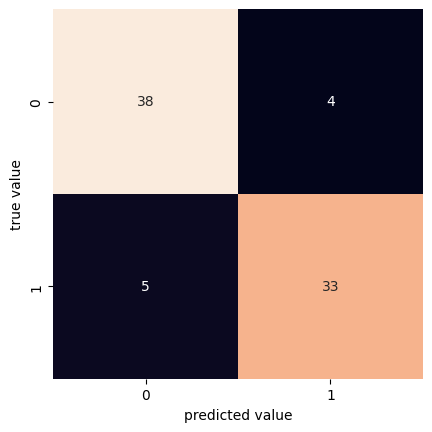

In [430]:
print_confusion_matrix(ytest, y_model_GaussianNB)

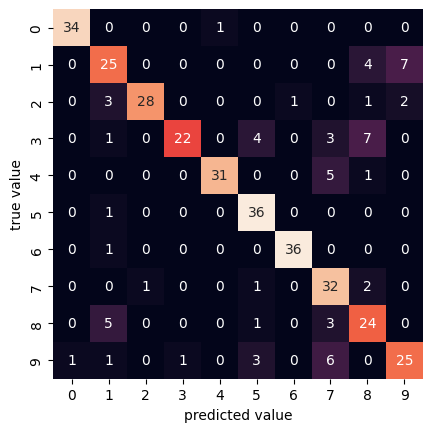

In [431]:
print_confusion_matrix(ydigits_test, ydigits_model_GaussianNB)

Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  4  7]
 [ 0  3 28  0  0  0  1  0  1  2]
 [ 0  1  0 22  0  4  0  3  7  0]
 [ 0  0  0  0 31  0  0  5  1  0]
 [ 0  1  0  0  0 36  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  1  0  0  1  0 32  2  0]
 [ 0  5  0  0  0  1  0  3 24  0]
 [ 1  1  0  1  0  3  0  6  0 25]]


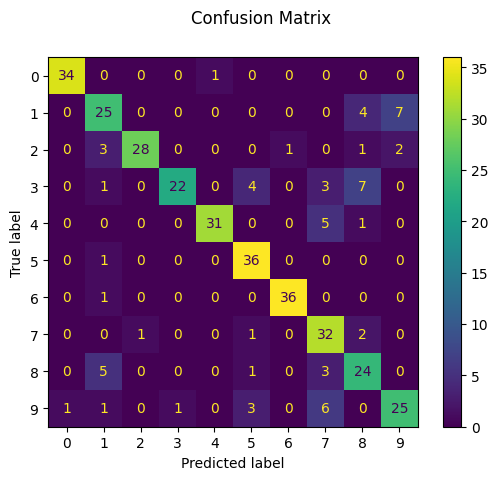

In [432]:
#ще один варіант confusion matrix

disp = metrics.ConfusionMatrixDisplay.from_predictions(ydigits_test, ydigits_model_GaussianNB)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [433]:
get_accuary_score(ytest, y_model_GaussianNB)

0.8875

Тепер також використаємо predict_proba() для обох моделей 

predict() is used to predict the actual class

predict_proba() is used to predict the class probabilities

In [434]:
def get_predict_proba(model, Xtest):
    return model.predict_proba((Xtest))

#get_predict_proba(model_GaussianNB, Xtest) 
#get_predict_proba(model_MultinomialNB, Xtest) 
#get_predict_proba(modeldigits_MultinomialNB, Xdigits_test) 


6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.

In [435]:
'''print(accuracy_score(ytest, y_model_GaussianNB))
y_model_GaussianNB_train = model_GaussianNB.predict(Xtrain)        #4. Розрахунок прогнозу значень для нових даних
print(accuracy_score(ytrain, y_model_GaussianNB_train))
'''

'print(accuracy_score(ytest, y_model_GaussianNB))\ny_model_GaussianNB_train = model_GaussianNB.predict(Xtrain)        #4. Розрахунок прогнозу значень для нових даних\nprint(accuracy_score(ytrain, y_model_GaussianNB_train))\n'

In [436]:
'''
print(accuracy_score(ytest, y_model_MultinomialNB))
y_model_MultinomialNB_train = model_MultinomialNB.predict(Xtrain)        #4. Розрахунок прогнозу значень для нових даних
print(accuracy_score(ytrain, y_model_MultinomialNB_train))
'''

'\nprint(accuracy_score(ytest, y_model_MultinomialNB))\ny_model_MultinomialNB_train = model_MultinomialNB.predict(Xtrain)        #4. Розрахунок прогнозу значень для нових даних\nprint(accuracy_score(ytrain, y_model_MultinomialNB_train))\n'

In [437]:
'''
from sklearn.metrics import f1_score
F1 = f1_score(y_pred=y_model_GaussianNB, y_true=ytest)
print(F1)
F1_1 = f1_score(y_pred=y_model_GaussianNB_train, y_true=ytrain)
print(F1_1)
'''

'\nfrom sklearn.metrics import f1_score\nF1 = f1_score(y_pred=y_model_GaussianNB, y_true=ytest)\nprint(F1)\nF1_1 = f1_score(y_pred=y_model_GaussianNB_train, y_true=ytrain)\nprint(F1_1)\n'

In [438]:
def get_F1(y_model, yt):
    return f1_score(y_pred=y_model, y_true=yt)

#get_F1(y_model_GaussianNB, ytest)

In [439]:
print(
    f"Classification report for classifier {modeldigits_GaussianNB}:\n"
    f"{metrics.classification_report(ydigits_test, ydigits_model_GaussianNB)}\n"
)
print(
    f"Classification report for classifier {modeldigits_MultinomialNB}:\n"
    f"{metrics.classification_report(ydigits_test, ydigits_model_MultinomialNB)}\n"
)

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.68      0.69      0.68        36
           2       0.97      0.80      0.88        35
           3       0.96      0.59      0.73        37
           4       0.97      0.84      0.90        37
           5       0.80      0.97      0.88        37
           6       0.97      0.97      0.97        37
           7       0.65      0.89      0.75        36
           8       0.62      0.73      0.67        33
           9       0.74      0.68      0.70        37

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.83      0.81      0.81       360


Classification report for classifier MultinomialNB():
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.86   

In [440]:
def test_overfitting(model, y_model, ytest, ytrain, Xtrain):
    #print("Accuracy score for test:", accuracy_score(ytest, y_model))
    y_model_train = model.predict(Xtrain)        #Розрахунок прогнозу значень для нових даних
    #print("Accuracy score for train:", accuracy_score(ytrain, y_model_train))
    print("Gap for accuracy score:", abs(accuracy_score(ytest, y_model) - accuracy_score(ytrain, y_model_train)))
    print("Gap for F1 score:", abs(get_F1(y_model, ytest) - get_F1(y_model_train, ytrain)))

test_overfitting(model_GaussianNB, y_model_GaussianNB, ytest, ytrain, Xtrain)

Gap for accuracy score: 0.006249999999999978
Gap for F1 score: 0.002716049382716079


Висновок до завадння 6:

Проаналізувавши метрики можна зробити висновки, що перенавчання немає

7. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi або iншi (згiдно з варiантом).

Мій варіант:
Для кожної моделi розрахувати апостерiорнi iмовiрностi для тестового прикладу, використовуючи метод predict_proba.


In [441]:
#get_predict_proba(model_GaussianNB) 
#get_predict_proba(model_MultinomialNB) 

8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

C:\Users\user\AppData\Local\Temp\ipykernel_448\3364566991.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


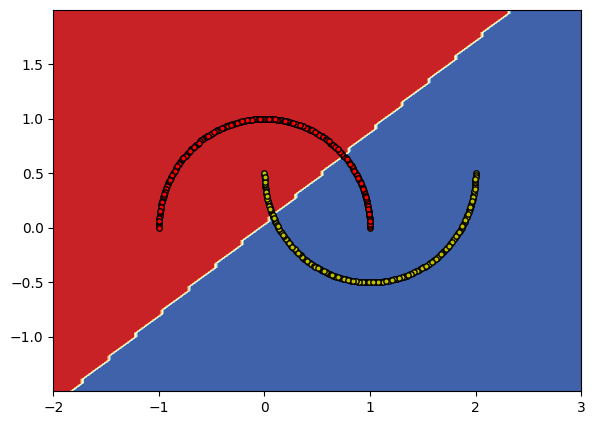

In [442]:
def print_decision_boundry(model):
    # Plot the decision boundary
    # Train
    plot_colors = "ryb" 

    # Plot the decision boundary
    ax = plt.subplot()
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax= plt.subplot()
    )

    # Plot the training points
    for i, color in zip(range(2), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
            )

print_decision_boundry(model=model_MultinomialNB)


9. В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:

• матрицю неточностей (confusion matrix),       

• точнiсть (precision), 
                        
• повноту (recall),

• мiру F1 (F1 score),

• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-
криву, показник AUC.

для второй модели тоже все сделать изагнать в функцию. чтобы все крассиво

In [443]:
def get_metrics(ytest, y_model):
    print(precision_score(y_true=ytest, y_pred=y_model))
    print(recall_score(y_true=ytest, y_pred=y_model))
    print(get_F1(y_model, ytest))

get_metrics(ytest, y_model_MultinomialNB)

0.7619047619047619
0.8421052631578947
0.8


In [444]:
'''
from sklearn.metrics import precision_score
precision_score(y_true=ytest, y_pred=y_model_GaussianNB)
'''

'\nfrom sklearn.metrics import precision_score\nprecision_score(y_true=ytest, y_pred=y_model_GaussianNB)\n'

In [445]:
'''
from sklearn.metrics import recall_score
recall_score(y_true=ytest, y_pred=y_model_GaussianNB)
'''

'\nfrom sklearn.metrics import recall_score\nrecall_score(y_true=ytest, y_pred=y_model_GaussianNB)\n'

In [446]:
'''
from sklearn.metrics import f1_score
f1_score(y_true=ytest, y_pred=y_model_GaussianNB)
'''

'\nfrom sklearn.metrics import f1_score\nf1_score(y_true=ytest, y_pred=y_model_GaussianNB)\n'

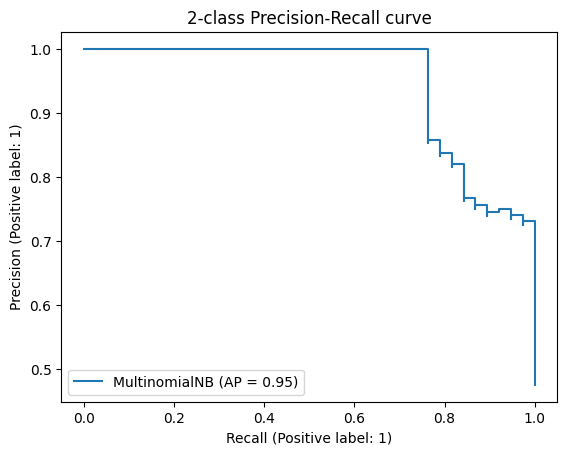

In [447]:
def print_PR_curve(model):
    display = PrecisionRecallDisplay.from_estimator(
        model, Xtest, ytest
        )
    _ = display.ax_.set_title("2-class Precision-Recall curve")

print_PR_curve(model_MultinomialNB)

In [448]:
def get_roc_auc_score(ytest, model):
    return roc_auc_score(ytest, get_predict_proba(model, Xtest)[:, 1])
#roc_auc_score(ytest, get_predict_proba(model_MultinomialNB)[:, 1])
get_roc_auc_score(ytest, model_MultinomialNB)

0.9436090225563911

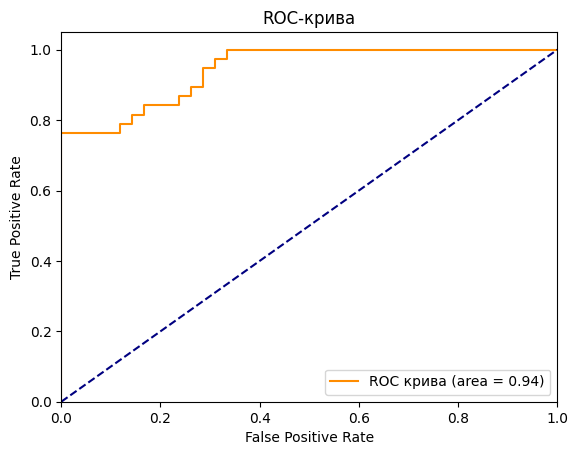

In [453]:
def print_ROC(ytest, model, Xtest):
    # строим график
    fpr, tpr, thresholds = roc_curve(ytest, get_predict_proba(model, Xtest)[:, 1], pos_label=1)
    #roc_display_mg = RocCurveDisplay(fpr=fpr, tpr= tpr).plot
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC крива (area = %0.2f)' % roc_auc_score(ytest, get_predict_proba(model, Xtest)[:, 1]))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-крива')
    plt.legend(loc="lower right")
    plt.show()
    
print_ROC(ytest, model_MultinomialNB, Xtest)


Замість ROC і Precision-Recall

visualize the first 7 test samples and show their predicted digit value in the title.

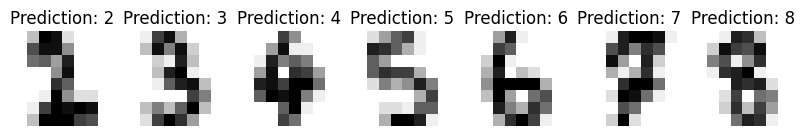

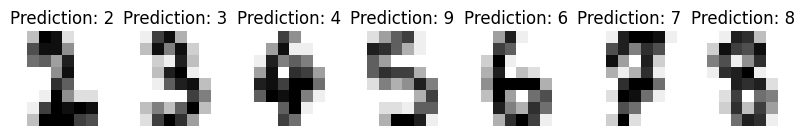

In [ ]:
def print_predict_digit(ydigits_model):
    _, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
    for ax, image, prediction in zip(axes, Xdigits_test, ydigits_model):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")

print_predict_digit(ydigits_model_GaussianNB)
print_predict_digit(ydigits_model_MultinomialNB)

12. Порівняши різні метрики, можна зроибити висновок:

Модель, дані в якій в кожному класі містять нормальний розподiл без коварiацiї мiж вимiрами(клас sklearn.naive_bayes.GaussianNB), працює значно краще для набору даних

sklearn.datasets.make_moons ніж модель з полiномiальним розподiлом(клас sklearn.naive_bayes.MultinomialNB)

Модель, дані в якій в кожному класі містять нормальний розподiл без коварiацiї мiж вимiрами(клас sklearn.naive_bayes.GaussianNB), працює гірше для набору даних


sklearn.datasets.load_digits ніж модель з полiномiальним розподiлом(клас sklearn.naive_bayes.MultinomialNB)


13. Розмір навчальної множини суттєво на якість моделі не впливає.

    Експоненціальна залежність.
    
    Оптимально було вибрано 400 екзамплярів для навчання(make_moons) і перевірки(розбито у відношені 80% і 20% відповідно).